e. Perturb all images in the training and testing set (using any 1 attack of your choice), train the model with perturbed training set image and then perform 10-class classification. Provide the classification report (u​ se sklearn library for assistance​), ​compare the training and testing accuracy with the previous case. ​Report SSIM for this case too and ​compare the results ​with
the previous case. Infer ​[ 30 Marks]



In [1]:
%tensorflow_version 2.x

In [2]:
# FGSM - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm
# colab ref - https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb
# https://colab.research.google.com/github/andantillon/cleverhans/blob/master/tutorials/future/tf2/notebook_tutorials/mnist_fgsm_tutorial.ipynb

# Install bleeding edge version of cleverhans
# !pip install cleverhans==2.1.0
# !pip install cleverhans

from google.colab import drive 
drive.mount('/content/gdrive') 
import os
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2'
!ls
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images'
!ls
!find . -maxdepth 2 -type d
!find . -maxdepth 1 -mindepth 1 -type d -exec sh -c 'echo "{} : $(find "{}" -type f | wc -l)" file\(s\)' \;

!python --version
# !pip install cleverhans==2.1.0
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model




# import tensorflow as tf
# from tensorflow import keras
# from keras.layers import Input, Lambda, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
# from keras.models import Model, load_model
# from keras.applications.resnet50 import preprocess_input, decode_predictions
# from keras.applications import InceptionV3
# from keras.applications.resnet50 import preprocess_input
# from keras.applications.resnet50 import ResNet50
# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator, load_img
# from keras.models import Sequential, Model
# from keras import Sequential
# from keras.layers import Dense, BatchNormalization
from keras import backend

# from cleverhans.utils_keras import KerasModelWrapper
# from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2
#Import necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Install bleeding edge version of cleverhans

from builtins import range, input

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False
import cv2
from glob import glob
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import cleverhans
print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

Mounted at /content/gdrive
/content/gdrive/My Drive/DAI_ASSIGNMENT_2
Classes.py  Images  processed_images
/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images
 1_one-pixel-attack-cifar10.ipynb      final_model_python2_tf1.h5
 2_one-pixel-attack-imagenet.ipynb     helper.py
 attack.py			       images
 CONTRIBUTING.md		       LICENSE
'Copy of final_model.h5'	       networks
'Copy of final_model_python2.h5'       __pycache__
'Copy of final_model_python2_tf1.h5'   README.md
 data				       requirements.txt
 differential_evolution.py	       test
 final_model.h5			       train
 final_model_python2.h5		       train.py
.
./train
./train/cane
./train/cavallo
./train/elefante
./train/farfalla
./train/gallina
./train/gatto
./train/mucca
./train/pecora
./train/ragno
./train/scoiattolo
./test
./test/cane
./test/cavallo
./test/elefante
./test/farfalla
./test/gallina
./test/gatto
./test/mucca
./test/pecora
./test/ragno
./test/scoiattolo
./__pycache__
./data
./images
./networks
./networks/capsul

In [3]:
h,w = (224,224)
batch = 32
train = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/train'
test = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/test'

dataloader = ImageDataGenerator(
                                  preprocessing_function = preprocess_input,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  )
train_loader = dataloader.flow_from_directory(
    train, 
    target_size = (h,w),
    batch_size = batch,
    class_mode= 'categorical',
    subset = 'training'
)

test_loader = dataloader.flow_from_directory(
    test, 
    target_size = (h,w),
    batch_size = 1,
    class_mode= 'categorical',
    subset = 'training'
)

print("testing example")
xtestex,ytestex = test_loader.next()
print(xtestex.shape)
print(ytestex.shape)
print("training example")
xtrainex, ytrainex = train_loader.next()
print(xtrainex.shape)
print(ytrainex.shape)
model = keras.models.load_model('final_model.h5') # My Saved model (Trained with Python 3 & TF 2.X)

# My Saved model (Trained with Python 2 & TF 1.X) https://drive.google.com/file/d/1PMmIIxvlDAYHNqs9CluWIVUWNu6jUoOS/view?usp=sharing
# My Saved model (Trained with Python 2 & TF 2.X) https://drive.google.com/file/d/1PDHK9pYj7_dZCUzdD7cHby5ikv5gw9G2/view?usp=sharing
# My Saved model (Trained with Python 3 & TF 2.X) https://drive.google.com/file/d/1HyQ5dyimMbY9yGqtH-cbvX71XTziIKqQ/view?usp=sharing

Found 15702 images belonging to 10 classes.
Found 10477 images belonging to 10 classes.
testing example
(1, 224, 224, 3)
(1, 10)
training example
(32, 224, 224, 3)
(32, 10)


# Part E (Using One Pixel Attack)

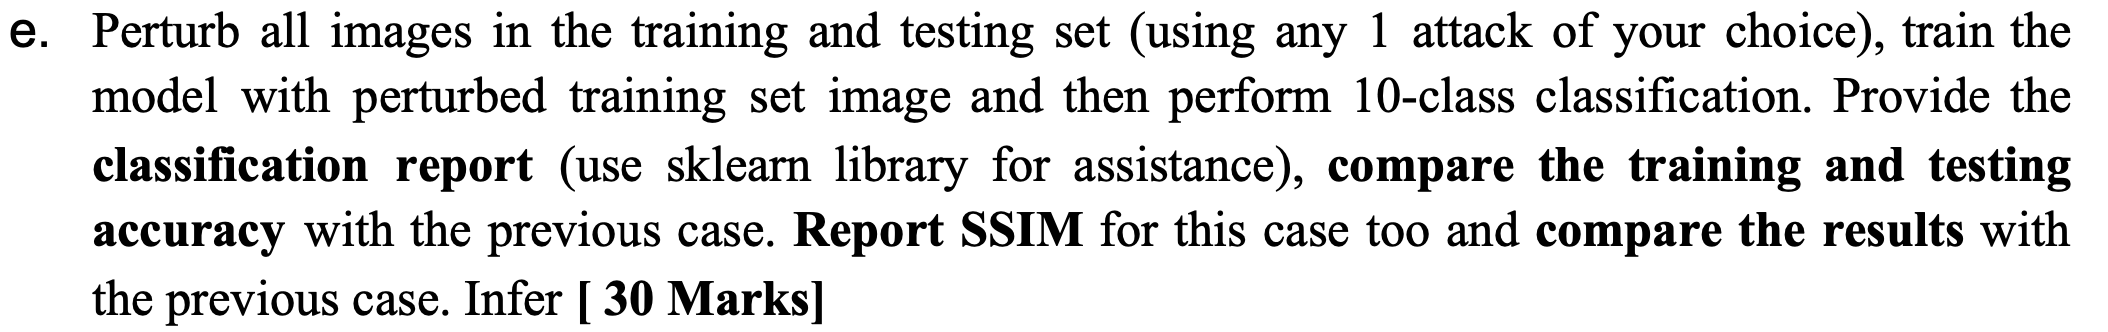

In [4]:
# If running in Google Colab, import files
try:
    import google.colab
    in_colab = True
except:
    in_colab = False

if in_colab:
    !git clone https://github.com/Hyperparticle/one-pixel-attack-keras.git
    !mv -v one-pixel-attack-keras/* .
    !rm -rf one-pixel-attack-keras

# Python Libraries
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
from keras import backend as K

# Helper functions
from differential_evolution import differential_evolution
import helper

matplotlib.style.use('ggplot')
np.random.seed(100) # just to ensure the future randomness point

Cloning into 'one-pixel-attack-keras'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 356 (delta 3), reused 0 (delta 0), pack-reused 346
Receiving objects: 100% (356/356), 44.57 MiB | 17.22 MiB/s, done.
Resolving deltas: 100% (204/204), done.
renamed 'one-pixel-attack-keras/1_one-pixel-attack-cifar10.ipynb' -> './1_one-pixel-attack-cifar10.ipynb'
renamed 'one-pixel-attack-keras/2_one-pixel-attack-imagenet.ipynb' -> './2_one-pixel-attack-imagenet.ipynb'
renamed 'one-pixel-attack-keras/attack.py' -> './attack.py'
renamed 'one-pixel-attack-keras/CONTRIBUTING.md' -> './CONTRIBUTING.md'
renamed 'one-pixel-attack-keras/data' -> './data'
renamed 'one-pixel-attack-keras/differential_evolution.py' -> './differential_evolution.py'
renamed 'one-pixel-attack-keras/helper.py' -> './helper.py'
renamed 'one-pixel-attack-keras/images' -> './images'
renamed 'one-pixel-attack-keras/LICENSE' -> './LICEN

10446


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True Label: farfalla
True Image Predictions Label/Class: farfalla
Perturbed Image Predictions Label/Class: farfalla


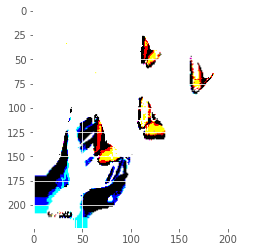

In [5]:
import random
s_number = random.randint(0,10477)
print(s_number)
image_id = s_number # Image index in the test set
plt.imshow(test_loader[image_id][0][0])
def perturb_image(xs, img):
    # If this function is passed just one perturbation vector,
    # pack it in a list to keep the computation the same
    if xs.ndim < 2:
        xs = np.array([xs])
    
    # Copy the image n == len(xs) times so that we can 
    # create n new perturbed images
    tile = [len(xs)] + [1]*(xs.ndim+1)
    imgs = np.tile(img, tile)
    
    # Make sure to floor the members of xs as int types
    xs = xs.astype(int)
    
    for x,img in zip(xs, imgs):
        # Split x into an array of 5-tuples (perturbation pixels)
        # i.e., [[x,y,r,g,b], ...]
        pixels = np.split(x, len(x) // 5)
        for pixel in pixels:
            # At each pixel's x,y position, assign its rgb value
            x_pos, y_pos, *rgb = pixel
            img[x_pos, y_pos] = rgb
    
    return imgs

image_id = s_number # Image index in the test set
pixel1 = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
pixel2 = np.array([64, 64, 0, 255, 255]) # pixel = x,y,r,g,b
pixel3 = np.array([124, 124, 225, 0, 255]) # pixel = x,y,r,g,b
pixel4 = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
pixel5 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
pixel6 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
pixel7 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
pixel8 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
pixel9 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b

image_perturbed = perturb_image(pixel1, test_loader[image_id][0][0])[0]
image_perturbed = perturb_image(pixel2, image_perturbed)[0]
image_perturbed = perturb_image(pixel3, image_perturbed)[0]
image_perturbed = perturb_image(pixel4, image_perturbed)[0]
image_perturbed = perturb_image(pixel5, image_perturbed)[0]
image_perturbed = perturb_image(pixel6, image_perturbed)[0]
image_perturbed = perturb_image(pixel7, image_perturbed)[0]
image_perturbed = perturb_image(pixel8, image_perturbed)[0]
image_perturbed = perturb_image(pixel9, image_perturbed)[0]
plt.imshow(image_perturbed)

classes = ["cane",
          "cavallo",
          "elefante",
          "farfalla",
          "gallina",
          "gatto",
          "mucca",
          "pecora",
          "ragno",
          "scoiattolo"]
original_image_op = np.array([test_loader[image_id][0][0]])
perturbed_image_op = np.array([image_perturbed])

true_label_op = np.argmax(test_loader[image_id][1][0])
true_img_prediction_prob = model(original_image_op)
perturbed_img_prediction_prob = model(perturbed_image_op)
print("True Label:", classes[true_label_op])
print("True Image Predictions Label/Class:", classes[np.argmax(true_img_prediction_prob)])
print("Perturbed Image Predictions Label/Class:", classes[np.argmax(perturbed_img_prediction_prob)])



Saving the Screenshot

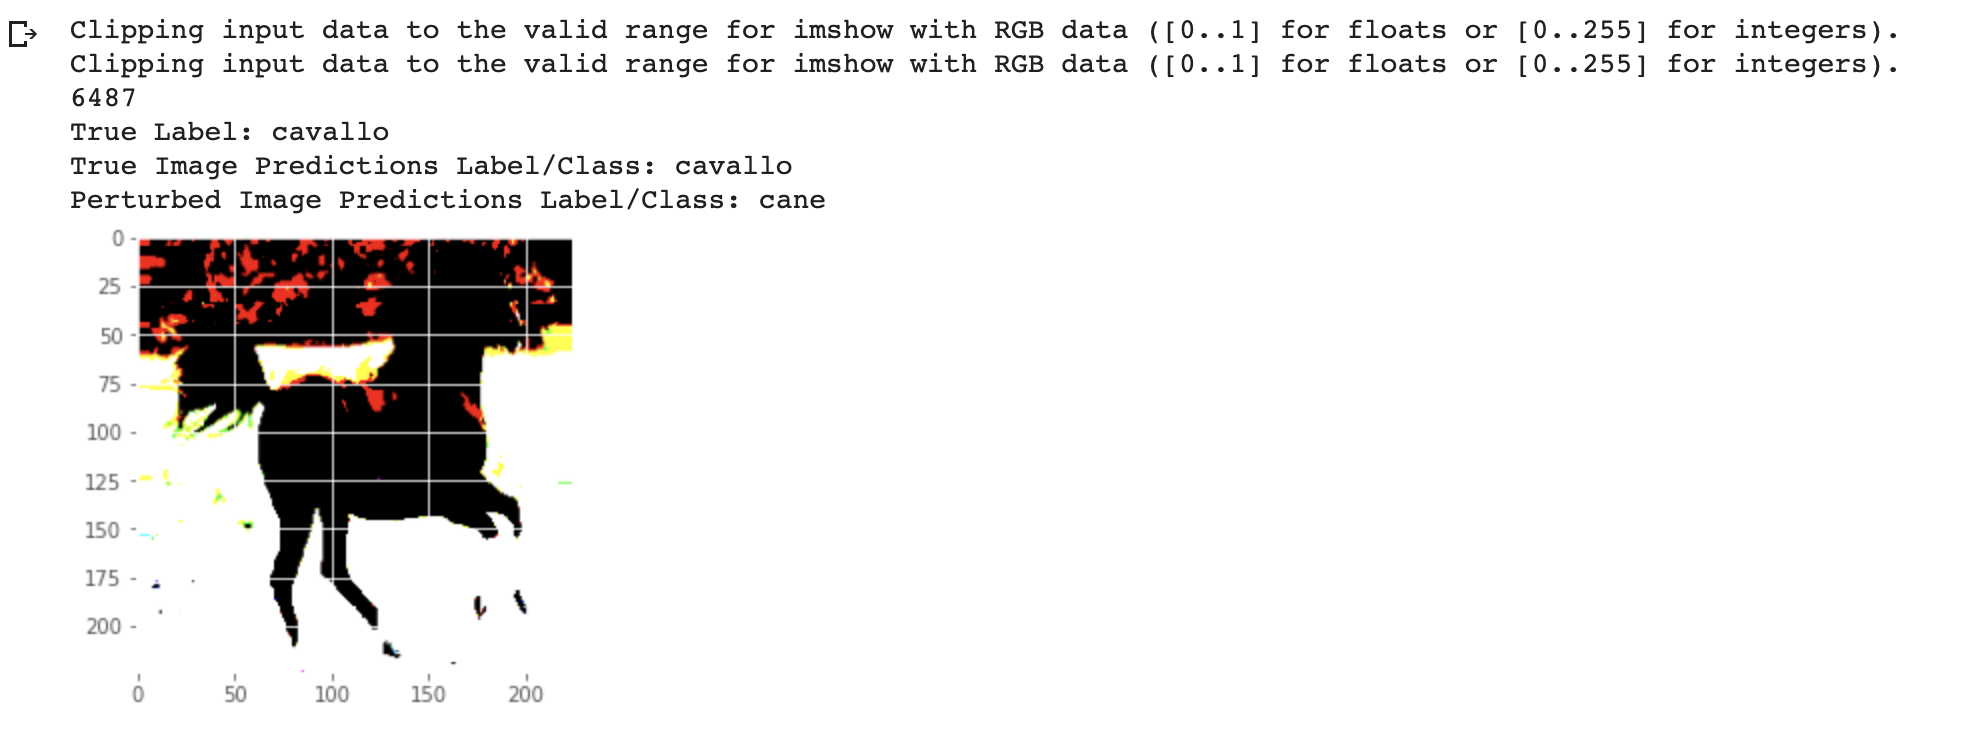

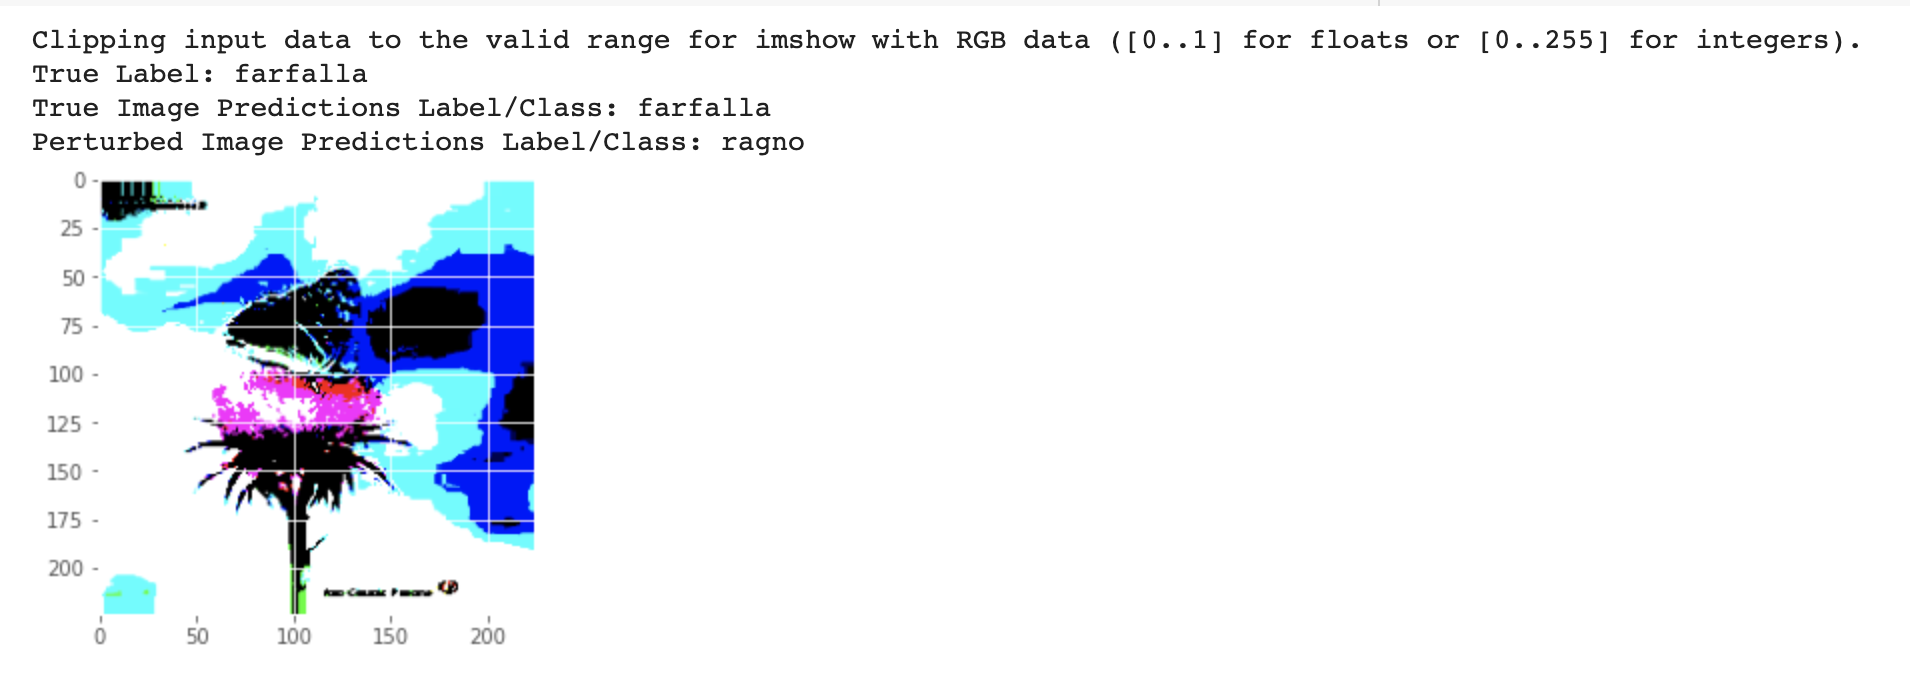

Since we have already computed major attacks, I have tried onepixel attack. It is fast, not resource hungry. Major drawback of this attack is that it is of the least effective attack.

For test set:

In [5]:
# THIS EXECUTION WILL TAKE A LOT OF TIME

successful_attacks = 0
for i in range(10477):
  image_id = i # Image index in the test set
  pixel1 = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel2 = np.array([64, 64, 0, 255, 255]) # pixel = x,y,r,g,b
  pixel3 = np.array([124, 124, 225, 0, 255]) # pixel = x,y,r,g,b
  pixel4 = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel5 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel6 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel7 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel8 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b

  image_perturbed = perturb_image(pixel1, test_loader[image_id][0][0])[0]
  image_perturbed = perturb_image(pixel2, image_perturbed)[0]
  image_perturbed = perturb_image(pixel3, image_perturbed)[0]
  image_perturbed = perturb_image(pixel4, image_perturbed)[0]
  image_perturbed = perturb_image(pixel5, image_perturbed)[0]
  image_perturbed = perturb_image(pixel6, image_perturbed)[0]
  image_perturbed = perturb_image(pixel7, image_perturbed)[0]
  image_perturbed = perturb_image(pixel8, image_perturbed)[0]
  # plt.imshow(image_perturbed)
  original_image_op = np.array([test_loader[image_id][0][0]])
  perturbed_image_op = np.array([image_perturbed])
  true_label_op = np.argmax(test_loader[image_id][1][0])
  true_img_prediction_prob = model(original_image_op)
  perturbed_img_prediction_prob = model(perturbed_image_op)
  if(np.argmax(true_img_prediction_prob) != np.argmax(perturbed_img_prediction_prob)):
    successful_attacks = successful_attacks + 1

# print("True Label:", classes[true_label_op])
# print("True Image Predictions Label/Class:", classes[np.argmax(true_img_prediction_prob)])
# print("Perturbed Image Predictions Label/Class:", classes[np.argmax(perturbed_img_prediction_prob)])


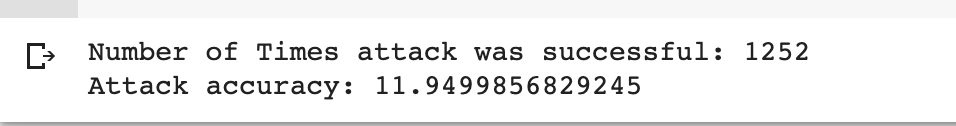

In [6]:
print("Number of Times attack was successful:", successful_attacks)
print("Attack accuracy:", (successful_attacks/10477)*100)

Number of Times attack was successful: 1211
Attack accuracy: 11.55865228595972


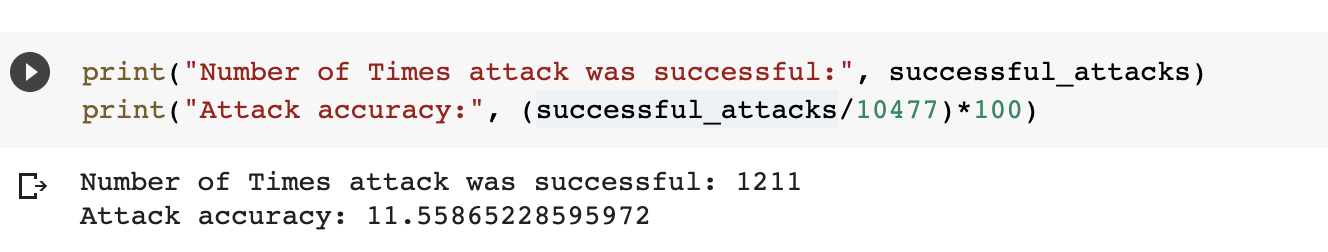

# Training new model (Adversarial Training):

Perturb all images in the training and testing set (using any 1 attack of your choice), train the model with perturbed training set image and then perform 10-class classification. Provide the classification report (u​ se sklearn library for assistance​), ​compare the training and testing accuracy with the previous case. ​Report SSIM for this case too and ​compare the results ​with the previous case. Infer ​[ 30 Marks]

Lets take 1000 samples from training and 200 samples from testloader randomly from the large training and testing dataset. 

Perturb all dataset. 

Then train the training set with our model.

provide metrics

In [190]:
# train_loader[0][0][0].shape
shuffle_test_loader = test_loader

import random

test_samples = []
test_labels = []

for i in range(200):
  random_integer = random.randint(0,10476)
  test_samples.append(shuffle_test_loader[random_integer][0][0])
  test_labels.append(shuffle_test_loader[random_integer][1][0])


In [191]:

test_samples = np.array(test_samples).reshape(200,224,224,3)
test_labels = np.array(test_labels).reshape(200,10)
print(np.array(test_samples).shape)
print(np.array(test_labels).shape)


(200, 224, 224, 3)
(200, 10)


In [192]:
ytest_p = test_labels
xtest_p = []
for i in range(200):
  pixel1 = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel2 = np.array([64, 64, 0, 255, 255]) # pixel = x,y,r,g,b
  pixel3 = np.array([124, 124, 225, 0, 255]) # pixel = x,y,r,g,b
  pixel4 = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel5 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel6 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel7 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel8 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel9 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b

  image_perturbed = perturb_image(pixel1, test_samples[i])[0]
  image_perturbed = perturb_image(pixel2, image_perturbed)[0]
  image_perturbed = perturb_image(pixel3, image_perturbed)[0]
  image_perturbed = perturb_image(pixel4, image_perturbed)[0]
  image_perturbed = perturb_image(pixel5, image_perturbed)[0]
  image_perturbed = perturb_image(pixel6, image_perturbed)[0]
  image_perturbed = perturb_image(pixel7, image_perturbed)[0]
  image_perturbed = perturb_image(pixel8, image_perturbed)[0]
  image_perturbed = perturb_image(pixel9, image_perturbed)[0]
  xtest_p.append(image_perturbed)


In [193]:
np.array(xtest_p).shape

(200, 224, 224, 3)

In [194]:
np.array(ytest_p).shape

(200, 10)

In [195]:
len(test_loader)

10477

In [196]:
train_samples = []
train_labels = []
for i in range(1000):
  random_integer = random.randint(0,10476)
  train_samples.append(shuffle_test_loader[random_integer][0])
  train_labels.append(shuffle_test_loader[random_integer][1][0])

In [197]:

train_samples = np.array(train_samples).reshape(1000,224,224,3)
train_labels = np.array(train_labels).reshape(1000,10)
print((train_samples).shape)
print((train_labels).shape)


(1000, 224, 224, 3)
(1000, 10)


In [198]:
ytrain_p = train_labels
xtrain_p = []
for i in range(1000):
  pixel1 = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel2 = np.array([64, 64, 0, 255, 255]) # pixel = x,y,r,g,b
  pixel3 = np.array([124, 124, 225, 0, 255]) # pixel = x,y,r,g,b
  pixel4 = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel5 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel6 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel7 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel8 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b
  pixel9 = np.array([34, 34, 255, 255, 0]) # pixel = x,y,r,g,b

  image_perturbed = perturb_image(pixel1, train_samples[i])[0]
  image_perturbed = perturb_image(pixel2, image_perturbed)[0]
  image_perturbed = perturb_image(pixel3, image_perturbed)[0]
  image_perturbed = perturb_image(pixel4, image_perturbed)[0]
  image_perturbed = perturb_image(pixel5, image_perturbed)[0]
  image_perturbed = perturb_image(pixel6, image_perturbed)[0]
  image_perturbed = perturb_image(pixel7, image_perturbed)[0]
  image_perturbed = perturb_image(pixel8, image_perturbed)[0]
  image_perturbed = perturb_image(pixel9, image_perturbed)[0]
  xtrain_p.append(image_perturbed)


In [199]:
xtrain = np.array(xtrain_p)
ytrain = np.array(ytrain_p)
xtest = np.array(xtest_p)
ytest = np.array(ytest_p)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1000, 224, 224, 3)
(1000, 10)
(200, 224, 224, 3)
(200, 10)


In [200]:
ytest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [201]:
# Adversarial Training

In [202]:
base_model = ResNet50(weights=None,input_shape=(224,224,3),include_top=False)
new_model = base_model.output
new_model = AveragePooling2D(pool_size=(7, 7))(new_model)
new_model = Flatten(name="flatten")(new_model)
new_model = Dense(256, activation="relu")(new_model)
# new_model = Dropout(0.5)(new_model)
new_model = Dense(10, activation="softmax")(new_model)
model = Model(inputs=base_model.input, outputs=new_model)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(xtrain,ytrain,epochs=30)


Epoch 1/30
32/32 [==============================] - 12s 174ms/step - loss: 3.6319 - accuracy: 0.1682
Epoch 2/30
32/32 [==============================] - 6s 174ms/step - loss: 2.4722 - accuracy: 0.2019
Epoch 3/30
32/32 [==============================] - 6s 173ms/step - loss: 2.1549 - accuracy: 0.2931
Epoch 4/30
32/32 [==============================] - 6s 174ms/step - loss: 2.1791 - accuracy: 0.2425
Epoch 5/30
32/32 [==============================] - 6s 174ms/step - loss: 2.2588 - accuracy: 0.2093
Epoch 6/30
32/32 [==============================] - 6s 174ms/step - loss: 2.1637 - accuracy: 0.2045
Epoch 7/30
32/32 [==============================] - 6s 174ms/step - loss: 2.1457 - accuracy: 0.2166
Epoch 8/30
32/32 [==============================] - 6s 173ms/step - loss: 2.0750 - accuracy: 0.2657
Epoch 9/30
32/32 [==============================] - 6s 174ms/step - loss: 2.0108 - accuracy: 0.2827
Epoch 10/30
32/32 [==============================] - 6s 174ms/step - loss: 1.9470 - accuracy: 0.309

Text(0, 0.5, 'EPOCH')

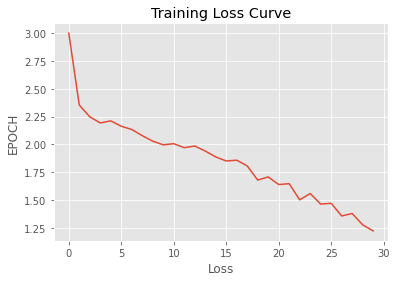

In [203]:
train_accuracies = history.history['accuracy']
train_losses = history.history['loss'] # train erros
plt.plot(train_losses)
plt.title("Training Loss Curve")
plt.xlabel('Loss')
plt.ylabel('EPOCH')

Text(0, 0.5, 'EPOCH')

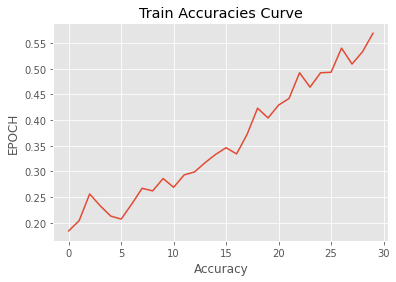

In [204]:
plt.plot(train_accuracies)
plt.title("Train Accuracies Curve")
plt.xlabel('Accuracy')
plt.ylabel('EPOCH')

In [205]:
test_loss, test_accuracy = model.evaluate(xtest,ytest)
print("test loss:")
print(test_loss)
print("test accu:")
print(test_accuracy)

7/7 [==============================] - 2s 56ms/step - loss: 2.1939 - accuracy: 0.4250
test loss:
2.1939125061035156
test accu:
0.42500001192092896


In [206]:

classes = [
           'cane',	 'elefante',  'gallina',  'mucca',   'ragno', 'cavallo',  'farfalla',
           'gatto',    'pecora',  'scoiattolo'
]

ypred = []
yactual = []

for iterator in range(len(xtest)):
  ypred.append(model.predict(np.array([xtest[iterator]])))
  yactual.append(ytest[iterator])

In [207]:
Y_pred = [list(train_loader.class_indices.keys())[i.argmax()]for i in ypred]
Y_test = [list(train_loader.class_indices.keys())[i.argmax()]for i in yactual]

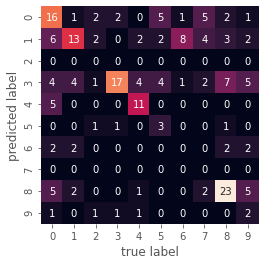

In [208]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Phew!!!

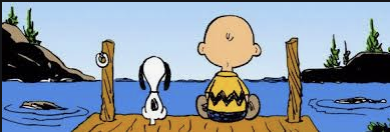